In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as itr

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [395]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [224]:
import PIL
from PIL import Image

In [283]:
import random


In [2]:
df = pd.read_csv('./final_SET.csv')

In [3]:
df.shape

(81, 5255)

In [4]:
photos_df = df.drop(columns=['card_filename', 'fill','number','shape','color'])

In [5]:
photos_array = np.array(photos_df)

In [38]:
fill_dict = {'outlined':0,
             'striped':1,
             'solid':2}
shape_dict = {'oval':0,
              'squiggle':1,
              'diamond':2}
color_dict = {'red':0,
              'purple':1,
              'green':2}

In [36]:
df['fill'] = df['fill'].map(fill_dict) 
df['shape'] = df['shape'].map(shape_dict)
df['color'] = df['color'].map(color_dict)

In [37]:
df.head()

,card_filename,fill,number,shape,color,0,1,2,3,4,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
0,SET0007,1,3,1,0,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,SeT0063.jpg,0,1,0,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,SeT0077.jpg,0,2,2,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,SeT0076.jpg,1,2,2,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,SeT0062.jpg,0,3,2,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [39]:
df_array = np.array(df)

In [40]:
df_array

array([['SET0007', 1, 3, ..., 255, 255, 255],
       ['SeT0063.jpg', 0, 1, ..., 255, 255, 255],
       ['SeT0077.jpg', 0, 2, ..., 255, 255, 255],
       ...,
       ['SeT0044.jpg', 0, 1, ..., 255, 255, 255],
       ['SeT0042.jpg', 2, 3, ..., 255, 255, 255],
       ['SeT0041.jpg', 1, 2, ..., 255, 255, 255]], dtype=object)

In [41]:
label_sets_of_3 = np.array(list(itr.combinations(df_array, 3)))

In [42]:
label_sets_of_3.shape

(85320, 3, 5255)

In [105]:
# takes in three labeled cards, 
# returns 1 if the three form a set, 0 if not

def is_set(group_of_3):
    if ((group_of_3[0][1]+group_of_3[1][1]+group_of_3[2][1]) % 3) != 0:    # fill
        return 0
    elif ((group_of_3[0][2]+group_of_3[1][2]+group_of_3[2][2]) % 3) != 0:  # number
        return 0
    elif ((group_of_3[0][3]+group_of_3[1][3]+group_of_3[2][3]) % 3) != 0:  # shape
        return 0
    elif ((group_of_3[0][4]+group_of_3[1][4]+group_of_3[2][4]) % 3) != 0:  # color
        return 0
    else: 
        return 1

In [107]:
labels = [is_set(group_of_3) for group_of_3 in label_sets_of_3]

In [110]:
sum(labels)

1079

#### a known set, in case I need to test things:

In [86]:
p = df[df['card_filename'] == 'SeT0065.jpg']

In [87]:
q = df[df['card_filename'] == 'SeT0066.jpg']

In [88]:
r = df[df['card_filename'] == 'SeT0067.jpg']

In [89]:
true_set = pd.concat([p, q, r])

In [90]:
true_set

,card_filename,fill,number,shape,color,0,1,2,3,4,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
12,SeT0065.jpg,1,1,1,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
16,SeT0066.jpg,2,2,2,0,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
19,SeT0067.jpg,0,3,0,2,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [91]:
true_3 = np.array(true_set)

In [92]:
true_3

array([['SeT0065.jpg', 1, 1, ..., 255, 255, 255],
       ['SeT0066.jpg', 2, 2, ..., 255, 255, 255],
       ['SeT0067.jpg', 0, 3, ..., 255, 255, 255]], dtype=object)

In [106]:
is_set(true_3)

1

# Creating X and y, train test split

In [166]:
y = labels

In [136]:
def get_3_photos(group_of_3):
    photos = []
    for i in range(3):
        photo_array = group_of_3[i][5:]
        # rescaling so that it's 0 to 1 instead of 0 to 255
        photo_array = photo_array.astype('float32')
        photo_array /= 255
        photo = photo_array.reshape(35, 50, 3)
        photos.append(photo)
    return photos
    

In [142]:
X = [get_3_photos(group_of_3) for group_of_3 in label_sets_of_3]

In [201]:
X_array = np.array(X)

In [205]:
X_array.shape

(85320, 3, 35, 50, 3)

In [170]:
X[0][0].shape

(35, 50, 3)

In [172]:
X_1 = [x[0] for x in X]

In [180]:
len(X_2)

85320

In [179]:
X_3[0].shape

(35, 50, 3)

In [176]:
X_2 = [x[1] for x in X]

In [177]:
X_3 = [x[2] for x in X]

In [182]:
len(y)

85320

In [185]:
85320*0.8


68256.0

In [206]:
X1_train = np.array(X_1[:68256])
X1_test = np.array(X_1[68256:])

In [207]:
X2_train = np.array(X_2[:68256])
X2_test = np.array(X_2[68256:])

In [208]:
X3_train = np.array(X_3[:68256])
X3_test = np.array(X_3[68256:])

In [195]:
y_train = y[:68256]
y_test = y[68256:]

In [200]:
X1_train[0].shape

(35, 50, 3)

## Creating network topology

In [210]:
cnn_model = Sequential()
# Adding  a convolutional layer:
cnn_model.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 50, 3)
))
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(4, activation='softmax'))

In [211]:
cnn_model_2 = Sequential()
# Adding  a convolutional layer:
cnn_model_2.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 50, 3)
))
cnn_model_2.add(MaxPooling2D(pool_size = (2,2))) # dimensions of region of pooling
cnn_model_2.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(128, activation='relu'))
cnn_model_2.add(Dense(4, activation='softmax'))

In [212]:
cnn_model_3 = Sequential()
# Adding  a convolutional layer:
cnn_model_3.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 50, 3)
))
cnn_model_3.add(MaxPooling2D(pool_size = (2,2))) # dimensions of region of pooling
cnn_model_3.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(Flatten())

cnn_model_3.add(Dense(128, activation='relu'))
cnn_model_3.add(Dense(4, activation='softmax'))

In [213]:
multi_input = concatenate([cnn_model.output, cnn_model_2.output, cnn_model_3.output])

In [218]:
model = Model(inputs=[cnn_model.input, cnn_model_2.input, cnn_model_3.input])
model.add(Dense(32, activation = 'relu')(multi_input))
model.add(Dense(1, activation = 'sigmoid'))

TypeError: ('Keyword argument not understood:', 'inputs')

In [215]:
model = Model(inputs=[cnn_model.input, cnn_model_2.input, cnn_model_3.input], outputs=x)

In [216]:
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])

In [217]:
history = model.fit(
    [X1_train, X2_train, X3_train], y_train, 
    validation_data = ([X1_test, X2_test, X3_test], y_test),
    epochs = 10
)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})

In [ ]:
# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(
	[trainAttrX, trainImagesX], trainY,
	validation_data=([testAttrX, testImagesX], testY),
	epochs=200, batch_size=8)
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict([testAttrX, testImagesX])

## Stuff from 
https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

In [ ]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model

In [ ]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# define the model input
	inputs = Input(shape=inputShape)
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
        	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
	# construct the CNN
	model = Model(inputs, x)
	# return the CNN
	return model

In [ ]:
# create the MLP and CNN models
mlp = models.create_mlp(trainAttrX.shape[1], regress=False)
cnn = models.create_cnn(64, 64, 3, regress=False)

# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])

# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [ ]:
# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(
	[trainAttrX, trainImagesX], trainY,
	validation_data=([testAttrX, testImagesX], testY),
	epochs=200, batch_size=8)
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict([testAttrX, testImagesX])

# Concatenating photos

In [221]:
X_array.shape

(85320, 3, 35, 50, 3)

In [227]:
X_array[0].shape

(3, 35, 50, 3)

In [244]:
def convert_to_image(pic_array):
    
    pic = np.array(pic_array)
    pic *= 255
    pic = pic.astype('uint8')
    
    return Image.fromarray(pic)

In [252]:
def glue(group_of_3):
    
    # turning each array into a pillow Image:
    img_0 = convert_to_image(group_of_3[0])
    img_1 = convert_to_image(group_of_3[1])
    img_2 = convert_to_image(group_of_3[2])
    
    # creating blank photo the size of 3 photos lined up
    glued = Image.new('RGB', (img_0.width + img_1.width + img_2.width, img_0.height))
    
    # pasting each image into the big blank image
    glued.paste(img_0, (0,0))
    glued.paste(img_1, (img_0.width,0))
    glued.paste(img_2, (img_0.width*2,0))
    
    return glued
    

In [254]:
glued_pic = glue(X_array[0])

In [247]:
label_sets_of_3[0]

array([['SET0007', 1, 3, ..., 255, 255, 255],
       ['SeT0063.jpg', 0, 1, ..., 255, 255, 255],
       ['SeT0077.jpg', 0, 2, ..., 255, 255, 255]], dtype=object)

In [255]:
glued_array = np.array(glued_pic)

In [257]:
glued_array.shape

(35, 150, 3)

In [258]:
glued_sets_of_3 = [glue(group_of_3) for group_of_3 in X_array]

In [259]:
glued_sets_of_3_arrays = [np.array(photo) for photo in glued_sets_of_3]

In [263]:
len(glued_sets_of_3_arrays)

85320

In [264]:
len(y)

85320

# train test split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(glued_sets_of_3_arrays, 
                                                     y, 
                                                     stratify = y, 
                                                     random_state = 5
                                                   )

In [269]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [271]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [272]:
X_train /= 255
X_test /= 255

In [277]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [278]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [279]:
type(y_train)

numpy.ndarray

## cnn on glued images:

In [266]:
cnn_model = Sequential()
# Adding  a convolutional layer:
cnn_model.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 150, 3)
))
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))


In [267]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [280]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Epoch 1/10
250/250 [==============================] - 67s 270ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 2/10
250/250 [==============================] - 73s 291ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 3/10
250/250 [==============================] - 75s 302ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 4/10
250/250 [==============================] - 79s 315ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 5/10
250/250 [==============================] - 93s 373ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 6/10
250/250 [==============================] - 75s 302ms/step - loss: 1.5071e-09 - accuracy: 0.8665 - val_loss: 1.5090e-09 - val_accuracy: 0.8663
Epoch 7/10
250/250 [==============================] - 75s 299ms/step - loss: 1.507

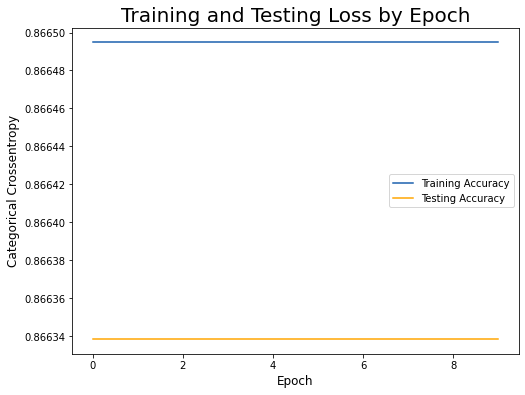

In [282]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='#185fad')
plt.plot(test_loss, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

# Balancing my classes

In [293]:
random.seed(5)
rand_1079 = random.sample(range(85320), 1079)

In [294]:
rand_1079

[81644,
 33481,
 46993,
 69473,
 3801,
 61030,
 32643,
 85062,
 6796,
 20558,
 14838,
 48731,
 61481,
 32318,
 49906,
 71271,
 13365,
 75227,
 32680,
 1718,
 28407,
 53497,
 36632,
 23865,
 51044,
 20919,
 9428,
 18188,
 80992,
 80930,
 58305,
 16606,
 17333,
 232,
 696,
 27453,
 28243,
 21739,
 21821,
 37919,
 41110,
 26068,
 70677,
 82015,
 26840,
 23811,
 25805,
 50229,
 39162,
 2827,
 47341,
 54382,
 21752,
 19097,
 34578,
 8537,
 43496,
 39499,
 79050,
 76826,
 443,
 78116,
 44288,
 8653,
 40626,
 46576,
 40116,
 63012,
 41391,
 24218,
 63074,
 61936,
 23084,
 7471,
 33578,
 2997,
 46877,
 52991,
 2368,
 71967,
 54896,
 47996,
 49330,
 75827,
 1189,
 59352,
 6124,
 23713,
 81751,
 25758,
 15600,
 32255,
 60582,
 45138,
 67173,
 46503,
 68773,
 32885,
 60666,
 14162,
 77301,
 48142,
 38779,
 4801,
 56751,
 11951,
 27326,
 44661,
 67224,
 80062,
 47530,
 19424,
 44559,
 36133,
 71453,
 12068,
 40953,
 41523,
 40130,
 23262,
 10249,
 82156,
 19512,
 40541,
 63411,
 21171,
 6363,
 106

In [295]:
new_y = [y[i] for i in rand_1079]

In [296]:
sum(new_y)

13

In [297]:
# get the indices that are 1's 

indices = []
for i in range(len(y)):
    if y[i] == 1:
        indices.append(i)



In [298]:
len(indices)

1079

In [299]:
indices

[47,
 87,
 219,
 265,
 333,
 438,
 474,
 564,
 636,
 689,
 862,
 945,
 969,
 1069,
 1141,
 1201,
 1243,
 1325,
 1363,
 1433,
 1460,
 1601,
 1688,
 1738,
 1806,
 1886,
 1962,
 2056,
 2285,
 2310,
 2457,
 2548,
 2597,
 2624,
 2646,
 2700,
 2772,
 3085,
 3104,
 3211,
 3291,
 3323,
 3458,
 3506,
 3550,
 3683,
 3736,
 3815,
 3873,
 3904,
 4068,
 4101,
 4206,
 4253,
 4358,
 4421,
 4608,
 4683,
 4740,
 4759,
 4848,
 4945,
 5090,
 5119,
 5167,
 5246,
 5278,
 5370,
 5408,
 5494,
 5549,
 5642,
 5742,
 5769,
 5776,
 5862,
 5956,
 6151,
 6300,
 6368,
 6449,
 6513,
 6612,
 6628,
 6717,
 6783,
 6891,
 6935,
 7010,
 7097,
 7136,
 7227,
 7238,
 7298,
 7398,
 7452,
 7557,
 7600,
 7690,
 7724,
 7847,
 7944,
 7983,
 8036,
 8078,
 8200,
 8257,
 8298,
 8498,
 8520,
 8597,
 8738,
 8851,
 8979,
 9170,
 9193,
 9261,
 9331,
 9446,
 9475,
 9559,
 9629,
 9687,
 9814,
 9881,
 10054,
 10111,
 10270,
 10327,
 10397,
 10412,
 10532,
 10618,
 10807,
 10844,
 10993,
 11036,
 11054,
 11150,
 11208,
 11235,
 11382,
 113

In [315]:
ind_set = set(indices)
rand_set = set(rand_1079)

In [319]:
intrsctn = ind_set.intersection(rand_set)

In [321]:
len(intrsctn)

13

In [333]:
intrsctn


{4206,
 9331,
 11941,
 17389,
 20845,
 25113,
 26840,
 30725,
 32224,
 44056,
 55779,
 69509,
 74081}

In [314]:
new_y_set

{0, 1}

In [331]:
len(np.setdiff1d(rand_set, intrsctn)[0])

1079

In [332]:
len(rand_1079)

1079

In [334]:
rand_set

{64315,
 12290,
 59395,
 30724,
 30725,
 69639,
 12296,
 10249,
 45066,
 18441,
 10250,
 81933,
 9,
 71695,
 73737,
 49175,
 8216,
 36889,
 77850,
 77851,
 32795,
 59419,
 77853,
 67610,
 2075,
 28709,
 61481,
 6186,
 16426,
 63530,
 65581,
 71728,
 59441,
 41009,
 75827,
 20531,
 59446,
 8246,
 57,
 57405,
 28735,
 69697,
 14403,
 20548,
 2119,
 45127,
 24649,
 4171,
 18507,
 20558,
 8271,
 22606,
 45138,
 30804,
 86,
 8281,
 32858,
 10333,
 82015,
 8289,
 59490,
 53348,
 77925,
 8294,
 30823,
 67692,
 4206,
 49263,
 14448,
 49265,
 79985,
 73842,
 32885,
 61559,
 124,
 2178,
 22658,
 18562,
 6278,
 16519,
 8326,
 67723,
 12428,
 32908,
 142,
 37007,
 77973,
 41110,
 6295,
 65691,
 71840,
 18593,
 26786,
 51362,
 80034,
 30884,
 53408,
 75940,
 63659,
 69804,
 55467,
 61614,
 80043,
 69809,
 49330,
 73906,
 67763,
 41141,
 61622,
 73914,
 41147,
 61628,
 71869,
 80062,
 14526,
 4288,
 30910,
 18626,
 49340,
 82112,
 73930,
 71882,
 12490,
 6347,
 35023,
 207,
 28880,
 37074,
 211,
 43

In [335]:
intrsctn.intersection(rand_set)

{4206,
 9331,
 11941,
 17389,
 20845,
 25113,
 26840,
 30725,
 32224,
 44056,
 55779,
 69509,
 74081}

In [338]:
not_sets = rand_set.difference(intrsctn)

In [339]:
sets = ind_set

In [340]:
final_indices = not_sets.union(sets)

In [341]:
final_ind_list = list(final_indices)

In [352]:
len(final_ind_list)

2145

In [348]:
X_array[0].shape

(3, 35, 50, 3)

In [349]:
len(glued_sets_of_3_arrays)

85320

In [350]:
X_sample = [glued_sets_of_3_arrays[i] for i in final_ind_list]

In [351]:
len(X_sample)

2145

In [353]:
y_sample = [y[i] for i in final_ind_list]

In [355]:
len(y_sample)

2145

In [356]:
X_sample = np.array(X_sample)
X_sample = X_sample.astype('float32')
X_sample /= 255

y_sample = np.array(y_sample)
y_sample = y_sample.astype('float32')




# redoing the neural net

In [357]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sample, 
                                                     y_sample, 
                                                     stratify = y_sample, 
                                                     random_state = 5
                                                   )

In [373]:
cnn_model = Sequential()
# Adding  a convolutional layer:
cnn_model.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 150, 3)
))
cnn_model.add(Conv2D(16, kernel_size=(4, 4), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))


In [374]:
cnn_model.compile(loss='bce',
                  optimizer='adam',
                  metrics=['accuracy'])

In [379]:
# Fit model on training data
history = cnn_model.fit(Xs_train,
                        ys_train,
                        batch_size=256,
                        validation_data=(Xs_test, ys_test),
                        epochs=100,
                        verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 299ms/step - loss: 0.6805 - accuracy: 0.5703 - val_loss: 0.7055 - val_accuracy: 0.4507
Epoch 2/100
7/7 [==============================] - 2s 266ms/step - loss: 0.6810 - accuracy: 0.5703 - val_loss: 0.7068 - val_accuracy: 0.4693
Epoch 3/100
7/7 [==============================] - 2s 294ms/step - loss: 0.6752 - accuracy: 0.5871 - val_loss: 0.7075 - val_accuracy: 0.4618
Epoch 4/100
7/7 [==============================] - 2s 350ms/step - loss: 0.6744 - accuracy: 0.5784 - val_loss: 0.7101 - val_accuracy: 0.4637
Epoch 5/100
7/7 [==============================] - 2s 295ms/step - loss: 0.6729 - accuracy: 0.5908 - val_loss: 0.7133 - val_accuracy: 0.4544
Epoch 6/100
7/7 [==============================] - 2s 306ms/step - loss: 0.6711 - accuracy: 0.5951 - val_loss: 0.7161 - val_accuracy: 0.4600
Epoch 7/100
7/7 [==============================] - 2s 296ms/step - loss: 0.6697 - accuracy: 0.5902 - val_loss: 0.7168 - val_accuracy: 0.4581
Epoch 8/100
7

Epoch 59/100
7/7 [==============================] - 2s 286ms/step - loss: 0.1101 - accuracy: 0.9652 - val_loss: 0.8764 - val_accuracy: 0.6890
Epoch 60/100
7/7 [==============================] - 2s 313ms/step - loss: 0.0921 - accuracy: 0.9757 - val_loss: 0.8896 - val_accuracy: 0.7374
Epoch 61/100
7/7 [==============================] - 2s 289ms/step - loss: 0.0953 - accuracy: 0.9714 - val_loss: 0.9598 - val_accuracy: 0.7188
Epoch 62/100
7/7 [==============================] - 2s 283ms/step - loss: 0.0917 - accuracy: 0.9745 - val_loss: 0.9839 - val_accuracy: 0.7114
Epoch 63/100
7/7 [==============================] - 2s 297ms/step - loss: 0.0886 - accuracy: 0.9714 - val_loss: 1.0082 - val_accuracy: 0.7281
Epoch 64/100
7/7 [==============================] - 2s 295ms/step - loss: 0.0940 - accuracy: 0.9639 - val_loss: 0.9489 - val_accuracy: 0.6927
Epoch 65/100
7/7 [==============================] - 2s 285ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.9986 - val_accuracy: 0.6927
Epoch 

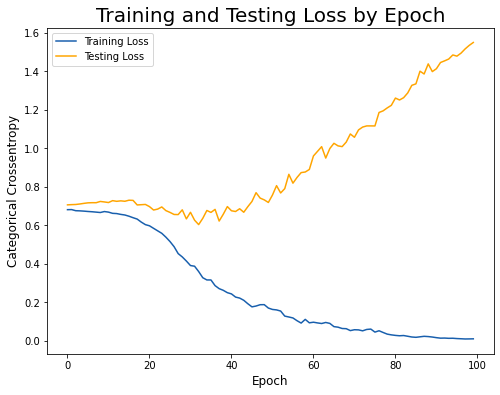

In [380]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

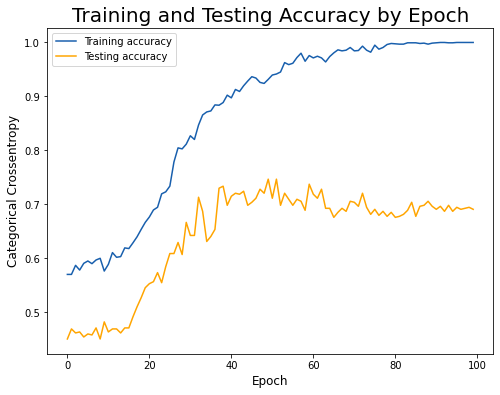

In [381]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training accuracy', color='#185fad')
plt.plot(test_loss, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

In [382]:
max(history.history['val_accuracy']) # for 100 epochs

0.7467411756515503

In [377]:
min(history.history['val_loss']) # for 10 epochs

0.694784939289093

In [378]:
max(history.history['val_accuracy']) # for 10 epochs

0.5027933120727539

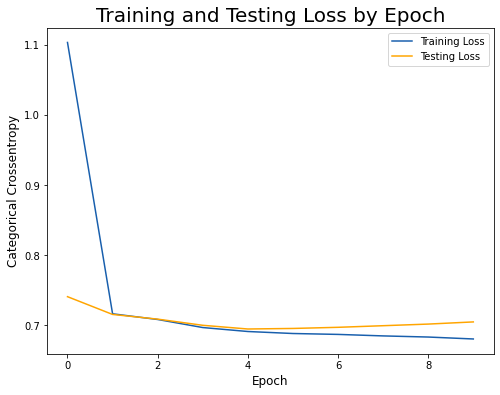

In [376]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

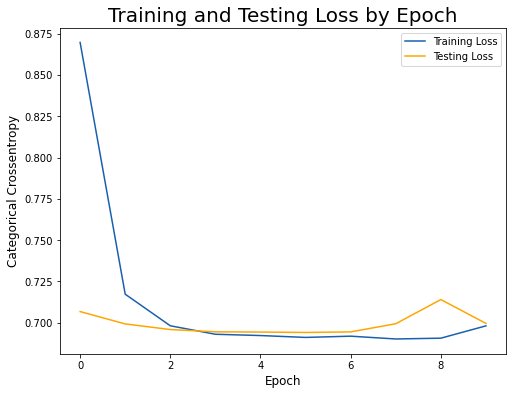

In [365]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

In [389]:
checkpoint = ModelCheckpoint('./best_model', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [390]:
cnn_model_2 = Sequential()
# Adding  a convolutional layer:
cnn_model_2.add(Conv2D(
    filters = 6, # should do more like 32
    kernel_size = (3,3), # Size of filters
    activation = 'relu',
    input_shape = (35, 150, 3)
))
cnn_model_2.add(Conv2D(16, kernel_size=(4, 4), activation="relu"))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(128, activation='relu'))
cnn_model_2.add(Dense(64, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))


In [391]:
cnn_model_2.compile(loss='bce',
                  optimizer='adam',
                  metrics=['accuracy'])

In [392]:
# Fit model on training data
history_2 = cnn_model_2.fit(Xs_train,
                        ys_train,
                        batch_size=256,
                        validation_data=(Xs_test, ys_test),
                        epochs=100,
                        verbose=1,
                        callbacks = checkpoint)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.2178 - accuracy: 0.5205
Epoch 00001: val_accuracy improved from -inf to 0.50279, saving model to ./best_model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./best_model/assets
7/7 [==============================] - 6s 820ms/step - loss: 1.2178 - accuracy: 0.5205 - val_loss: 0.9250 - val_accuracy: 0.5028
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.7645 - accuracy: 0.4944
Epoch 00002: val_accuracy did not improve from 0.50279
7/7 [==============================] - 2s 287ms/step - loss: 0.7645 - accuracy: 0.4944 - val_loss: 0.6981 - val_accuracy: 0.4972
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.5012
Epoch 00003: val_accuracy improved from 0.50279 to 0.50466, saving model to ./best_model
INFO:tensorflow:Assets written to: ./best_model/assets
7/7 [==============================] - 3s 

Epoch 29/100
7/7 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6001
Epoch 00029: val_accuracy did not improve from 0.50466
7/7 [==============================] - 2s 289ms/step - loss: 0.6585 - accuracy: 0.6001 - val_loss: 0.7291 - val_accuracy: 0.4749
Epoch 30/100
7/7 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.6225
Epoch 00030: val_accuracy did not improve from 0.50466
7/7 [==============================] - 2s 289ms/step - loss: 0.6540 - accuracy: 0.6225 - val_loss: 0.7314 - val_accuracy: 0.4767
Epoch 31/100
7/7 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6269
Epoch 00031: val_accuracy did not improve from 0.50466
7/7 [==============================] - 2s 282ms/step - loss: 0.6396 - accuracy: 0.6269 - val_loss: 0.7347 - val_accuracy: 0.4711
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.6331
Epoch 00032: val_accuracy did not improve from 0.50466
7/7 [============

Epoch 83/100
7/7 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9963
Epoch 00083: val_accuracy did not improve from 0.74302
7/7 [==============================] - 2s 282ms/step - loss: 0.0266 - accuracy: 0.9963 - val_loss: 0.9042 - val_accuracy: 0.7356
Epoch 84/100
7/7 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9938
Epoch 00084: val_accuracy improved from 0.74302 to 0.74488, saving model to ./best_model
INFO:tensorflow:Assets written to: ./best_model/assets
7/7 [==============================] - 3s 396ms/step - loss: 0.0373 - accuracy: 0.9938 - val_loss: 0.9725 - val_accuracy: 0.7449
Epoch 85/100
7/7 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9932
Epoch 00085: val_accuracy did not improve from 0.74488
7/7 [==============================] - 2s 286ms/step - loss: 0.0315 - accuracy: 0.9932 - val_loss: 0.9293 - val_accuracy: 0.7412
Epoch 86/100
7/7 [==============================] - ETA: 0s - loss: 0.0259 - 

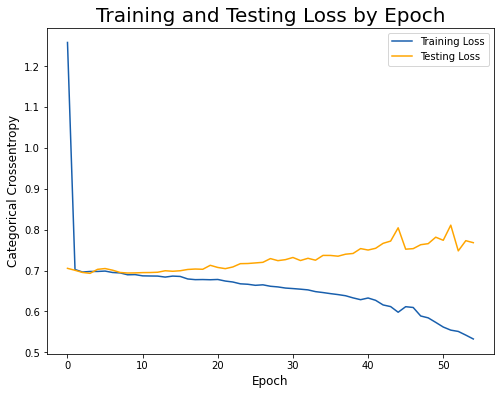

In [386]:
# Check out our train loss and test loss over epochs.
train_loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
#plt.xticks(np.arange(100), np.arange(100))

plt.legend(fontsize = 10);

In [387]:
max(history_2.history['val_accuracy']) # for 100 epochs

0.5530726313591003

In [396]:

new_model = load_model('./best_model')

# Check its architecture
new_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 33, 148, 6)        168       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 30, 145, 16)       1552      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 72, 16)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 17280)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               2211968   
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 1)               

In [461]:
loss, acc = new_model.evaluate(Xs_test,  ys_test, verbose=2)

17/17 - 0s - loss: 1.0626 - accuracy: 0.7467


In [463]:
y_test_pred = new_model.predict(Xs_test)

# X_wrong = Xs_test[y_test != y_test_pred]
# y_wrong_true = y_test[y_test != y_test_pred]
# y_wrong_pred = y_test_pred[y_test != y_test_pred]
# ix = 2
# plt.imshow(X_wrong[ix], cmap="plasma");
# print("Really was:")
# print(y_wrong_true[ix])
# print("Our model thought it was:")
# print(y_wrong_pred[ix])

In [595]:
np.save('./sigmoid_preds', y_test_pred)

In [399]:
len(ys_test)

537

In [466]:
1/(1+ np.exp(-y_test_pred[0]))

array([0.51087767], dtype=float32)

In [472]:
def pred_to_yes_no(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [473]:
actual_predictions = [pred_to_yes_no(x) for x in y_test_pred]

In [479]:
sum(actual_predictions)

322

In [480]:
sum(ys_test)

270

In [486]:
acc_by_molly = [[ys_test[i] == actual_predictions[i]][0] for i in range(537)]
acc_by_molly = [int(val) for val in acc_by_molly]

In [488]:
sum(acc_by_molly)/537

0.7467411545623837

In [489]:
indices = [i for i in range(537) if (acc_by_molly[i] == 0)]

In [597]:
np.save('./wrong_indices', indices)

In [493]:
wrong_sets = [Xs_test[i] for i in indices]

In [496]:
wrong_sets[0].shape

(35, 150, 3)

In [502]:
wrong_sets[0][:,0:50,:].shape

(35, 50, 3)

In [497]:
len(wrong_sets)

136

In [503]:
def unglue(photo):
    img_1 = photo[:, 0:50, :]
    img_2 = photo[:, 50:100, :]
    img_3 = photo[:, 100:150, :]
    return [img_1, img_2, img_3]

In [574]:
imgs = unglue(wrong_sets[0])

In [575]:
len(imgs)

3

In [576]:
imgs[0].shape

(35, 50, 3)

In [507]:
np.save('./mislabeled', wrong_sets)

In [508]:
df = pd.read_csv('./final_SET.csv')

In [509]:
photos_df = df.drop(columns=['card_filename', 'fill','number','shape','color'])

In [517]:
photos_df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
5245    int64
5246    int64
5247    int64
5248    int64
5249    int64
Length: 5250, dtype: object

In [577]:
trial_array = imgs[0].reshape(1,-1)

In [578]:
trial_array *= 255

In [579]:
trial_array = trial_array[0].astype('int64')

In [523]:
min(trial_array)

86

In [522]:
photos_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [525]:
min(photos_df['0'])

254

In [580]:
M = (photos_df == trial_array).all(1)

In [553]:
sum(M.astype(int))

1

In [555]:
M

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [581]:
[i for i in range(81) if M[i] == 1]

[70]

In [534]:
trial_array_list = list(trial_array)

In [561]:

omg = np.array(trial_array_list)
omg = omg.astype('uint8')
omg = omg.reshape(35, 50, 3)

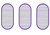

In [562]:
Image.fromarray(omg)

In [564]:
df.iloc[[69,70]]

,card_filename,fill,number,shape,color,0,1,2,3,4,...,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249
69,SeT0047.jpg,striped,1,oval,purple,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
70,SeT0057.jpg,striped,3,oval,purple,254,254,254,255,255,...,255,255,255,255,255,255,255,255,255,255


# Finding the labels of the mislabeled sets

In [584]:
def get_indices(pic):
    indices_of_pics = []
    imgs = unglue(pic)
    for i in range(3):
        img_array = imgs[i].reshape(1, -1)
        img_array *= 255
        img_array = img_array[0].astype('int64')
        M = (photos_df == img_array).all(1)
        n = [i for i in range(81) if M[i] == 1][0]
        indices_of_pics.append(n)
    return indices_of_pics

In [585]:
get_indices(wrong_sets[0])

[70, 71, 73]

In [586]:
sets_by_indices = [get_indices(glued_set_of_3) for glued_set_of_3 in wrong_sets]

In [587]:
sets_by_indices

[[70, 71, 73],
 [1, 34, 46],
 [4, 47, 76],
 [16, 59, 71],
 [0, 10, 72],
 [14, 34, 72],
 [24, 60, 76],
 [28, 0, 74],
 [24, 30, 42],
 [0, 54, 73],
 [13, 21, 69],
 [12, 28, 30],
 [14, 18, 36],
 [19, 24, 37],
 [4, 26, 66],
 [0, 55, 70],
 [3, 15, 40],
 [28, 29, 72],
 [7, 16, 21],
 [5, 11, 39],
 [13, 54, 65],
 [16, 37, 64],
 [36, 60, 77],
 [44, 56, 66],
 [71, 73, 78],
 [39, 40, 69],
 [1, 26, 30],
 [0, 18, 55],
 [4, 18, 40],
 [12, 45, 50],
 [14, 45, 69],
 [0, 5, 67],
 [15, 71, 72],
 [15, 30, 56],
 [19, 54, 65],
 [0, 30, 54],
 [25, 64, 65],
 [10, 37, 70],
 [20, 37, 63],
 [42, 46, 71],
 [13, 34, 64],
 [3, 29, 30],
 [10, 32, 74],
 [40, 59, 78],
 [1, 41, 75],
 [15, 17, 20],
 [20, 28, 41],
 [8, 26, 50],
 [35, 45, 73],
 [19, 64, 67],
 [17, 34, 38],
 [17, 18, 73],
 [25, 30, 32],
 [43, 58, 63],
 [47, 48, 55],
 [14, 62, 73],
 [12, 23, 51],
 [0, 2, 11],
 [14, 32, 78],
 [0, 22, 34],
 [12, 43, 47],
 [12, 65, 77],
 [8, 35, 40],
 [8, 28, 32],
 [39, 41, 76],
 [13, 25, 42],
 [50, 57, 66],
 [22, 28, 62],
 [18

In [588]:
correct_indices = [i for i in range(537) if (acc_by_molly[i] == 1)]

In [589]:
correct_sets = [Xs_test[i] for i in correct_indices]

In [590]:
len(correct_indices)

401

In [592]:
correct_sets_indices = [get_indices(glued_set_of_3) for glued_set_of_3 in correct_sets]

In [593]:
np.save('./mislabeled_indices', sets_by_indices)